In [1]:
import pandas as pd
import numpy as np
from gurobipy import *

In [2]:
data_test = pd.read_csv('LC_TestData_2020.csv')
output_lr_l1_bal = pd.read_csv('output_lr_l1_bal_new.csv')
output_rf_bal_data = pd.read_csv('output_rf_bal_data.csv')
output_XGB_bal_data = pd.read_csv('output_XGB_bal_data.csv')

In [3]:
data_test = data_test.drop(['term', 'int_rate', 'installment', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 
                            'verification_status', 'loan_status', 'title', 'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line', 
                            'inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 
                            'Unnamed: 21'], axis=1)
data_test = pd.get_dummies(data_test, columns=['addr_state'])
data_test['Expected_return_Lasso'] = output_lr_l1_bal['Expected_return']
data_test['Expected_return_RF'] = output_rf_bal_data['Expected_return']
data_test['Expected_return_XGB'] = output_XGB_bal_data['Expected_return']

In [4]:
state_data = data_test.drop(['loan_amnt', 'Expected_return_Lasso','Expected_return_RF', 'Expected_return_XGB'], axis=1)
state_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96745 entries, 0 to 96744
Data columns (total 49 columns):
addr_state_AK    96745 non-null uint8
addr_state_AL    96745 non-null uint8
addr_state_AR    96745 non-null uint8
addr_state_AZ    96745 non-null uint8
addr_state_CA    96745 non-null uint8
addr_state_CO    96745 non-null uint8
addr_state_CT    96745 non-null uint8
addr_state_DC    96745 non-null uint8
addr_state_DE    96745 non-null uint8
addr_state_FL    96745 non-null uint8
addr_state_GA    96745 non-null uint8
addr_state_HI    96745 non-null uint8
addr_state_ID    96745 non-null uint8
addr_state_IL    96745 non-null uint8
addr_state_IN    96745 non-null uint8
addr_state_KS    96745 non-null uint8
addr_state_KY    96745 non-null uint8
addr_state_LA    96745 non-null uint8
addr_state_MA    96745 non-null uint8
addr_state_MD    96745 non-null uint8
addr_state_ME    96745 non-null uint8
addr_state_MI    96745 non-null uint8
addr_state_MN    96745 non-null uint8
addr_state_MO    

## Lasso Logistic Regression (Balanced + Grouped)

### Subtask 3

In [5]:
loan_amnt_max = np.array(data_test['loan_amnt'])
#pd_array = np.array(data_test['prob_default'])
expected_rate_Lasso_array = np.array(data_test['Expected_return_Lasso'])    

In [6]:
m = Model("Portfolio optimizer") # creates an empty model

# Variables x1, x2, ..., x96745: Amount invested in each loan
amount_var = m.addVars(96745, vtype=GRB.CONTINUOUS, name = 'Loan_amount')

# Set objective function
m.setObjective(sum(amount_var[i]*(1+expected_rate_Lasso_array[i]) for i in range(96745)), GRB.MAXIMIZE)

# Constraints: These follow the math formulation as described in lecture slides
# Total budget
m.addConstr(sum(amount_var[i] for i in range(96745)) <= 5000000)

# Maximum loan amount
for i in range(96745):
    m.addConstr(amount_var[i] <= loan_amnt_max[i], 'c2_2')
    m.addConstr(amount_var[i] >= 0, 'c2_1')
    
# Diversification
total_state = [0] * 49
for i in range(49):
    for j in range(96745):
        total_state[i] = total_state[i] + amount_var[j]*state_data.iloc[j,i]
    m.addConstr(total_state[i] <= 500000)

# Optimize model
try:
    m.optimize()
except GurobiError: 
    print('Optimize failed due to non-convexity')

Using license file C:\Users\HP\gurobi.lic
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 193540 rows, 96745 columns and 386980 nonzeros
Model fingerprint: 0x1c728aae
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [7e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 5e+06]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 0 rows and 96745 columns
Presolve time: 0.58s
Presolved: 96745 rows, 96795 columns, 290235 nonzeros


Barrier performed 0 iterations in 0.96 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 5 iterations and 0.98 seconds
Optimal objective  5.549557409e+06


In [7]:
money_invested = 0
for v in m.getVars():
    money_invested += v.x
money_invested

5000000.0

In [8]:
print('Objective value: %g' % m.objVal)

Objective value: 5.54956e+06


In [9]:
for v in m.getVars():
    print('%s %g' % (v.varName, v.x))

Loan_amount[0] 0
Loan_amount[1] 0
Loan_amount[2] 0
Loan_amount[3] 0
Loan_amount[4] 0
Loan_amount[5] 0
Loan_amount[6] 0
Loan_amount[7] 0
Loan_amount[8] 0
Loan_amount[9] 0
Loan_amount[10] 0
Loan_amount[11] 0
Loan_amount[12] 0
Loan_amount[13] 0
Loan_amount[14] 0
Loan_amount[15] 0
Loan_amount[16] 0
Loan_amount[17] 0
Loan_amount[18] 0
Loan_amount[19] 0
Loan_amount[20] 0
Loan_amount[21] 0
Loan_amount[22] 0
Loan_amount[23] 0
Loan_amount[24] 0
Loan_amount[25] 5000
Loan_amount[26] 0
Loan_amount[27] 0
Loan_amount[28] 0
Loan_amount[29] 0
Loan_amount[30] 0
Loan_amount[31] 0
Loan_amount[32] 0
Loan_amount[33] 0
Loan_amount[34] 0
Loan_amount[35] 0
Loan_amount[36] 0
Loan_amount[37] 0
Loan_amount[38] 0
Loan_amount[39] 0
Loan_amount[40] 0
Loan_amount[41] 0
Loan_amount[42] 0
Loan_amount[43] 0
Loan_amount[44] 0
Loan_amount[45] 0
Loan_amount[46] 0
Loan_amount[47] 0
Loan_amount[48] 0
Loan_amount[49] 0
Loan_amount[50] 0
Loan_amount[51] 0
Loan_amount[52] 0
Loan_amount[53] 0
Loan_amount[54] 0
Loan_amount[55] 0

In [10]:
m.printAttr('x')


    Variable            x 
-------------------------
Loan_amount[25]         5000 
Loan_amount[215]         1000 
Loan_amount[684]        24000 
Loan_amount[806]        16800 
Loan_amount[1072]        15000 
Loan_amount[1275]         4000 
Loan_amount[1602]         4000 
Loan_amount[1675]         1925 
Loan_amount[1770]        14000 
Loan_amount[1869]        12000 
Loan_amount[1964]         5225 
Loan_amount[2469]        35000 
Loan_amount[2476]         6050 
Loan_amount[3055]         5000 
Loan_amount[3074]        40000 
Loan_amount[3393]         4500 
Loan_amount[3451]        14000 
Loan_amount[3486]        16000 
Loan_amount[3507]        12000 
Loan_amount[3827]         6000 
Loan_amount[3995]         1600 
Loan_amount[4368]         4000 
Loan_amount[4712]        24000 
Loan_amount[4736]         3000 
Loan_amount[4836]        32000 
Loan_amount[5374]         3200 
Loan_amount[5622]         4150 
Loan_amount[5941]        12000 
Loan_amount[6085]        12000 
Loan_amount[6234]      

### Subtask 4

In [11]:
var_names = []
var_values = []

for var in m.getVars():
    if var.X >= 0: 
        var_names.append(str(var.varName))
        var_values.append(var.X)

In [12]:
value_dataset = pd.DataFrame(data=var_values)
value_dataset = value_dataset.add_suffix('_X')
value_dataset = value_dataset.rename(columns={'0_X': 'invested_amount'})
value_dataset['default'] = output_lr_l1_bal['default']
value_dataset['prob_default'] = output_lr_l1_bal['prob_default']
value_dataset['expected_rate_of_return'] = output_lr_l1_bal['Expected_return']
value_dataset['expected_return'] = (1+value_dataset['expected_rate_of_return'])*value_dataset['invested_amount']

In [13]:
def realized_return(row):
    if row['invested_amount'] > 0 and row['default'] == 0:
        return row['invested_amount']
    else:
        return 0

value_dataset = value_dataset.assign(invested_amount_realized=value_dataset.apply(realized_return, axis=1))
value_dataset['int_rate'] = output_lr_l1_bal['int_rate']
value_dataset['realized_return'] = (1+value_dataset['int_rate'])*value_dataset['invested_amount_realized']
value_dataset.iloc[20:30, :]

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return
20,0.0,0,0.330031,-0.027112,0.000000,0.0,0.1049,0.0
21,0.0,0,0.389350,-0.050840,0.000000,0.0,0.1049,0.0
22,0.0,0,0.351997,-0.026899,0.000000,0.0,0.1139,0.0
23,0.0,0,0.326131,-0.060552,0.000000,0.0,0.0699,0.0
24,0.0,0,0.398544,-0.087018,0.000000,0.0,0.0724,0.0
25,5000.0,0,0.309816,0.130974,5654.868735,5000.0,0.2549,6274.5
26,0.0,1,0.607648,-0.138159,0.000000,0.0,0.1049,0.0
27,0.0,0,0.414343,-0.030837,0.000000,0.0,0.1349,0.0
28,0.0,0,0.406722,-0.109489,0.000000,0.0,0.0532,0.0
29,0.0,0,0.621009,-0.088503,0.000000,0.0,0.1599,0.0


In [14]:
def not_realized_return(row):
    if row['invested_amount'] > 0 and row['default'] == 0:
        return 0
    else:
        return row['invested_amount']
value_dataset = value_dataset.assign(invested_amount_not_realized=value_dataset.apply(not_realized_return, axis=1))
value_dataset['not_realized_return'] = (0.6)*value_dataset['invested_amount_not_realized']

data_test1 = pd.read_csv('LC_TestData_2020.csv')
data_test1 = data_test1.drop(['term', 'int_rate', 'installment', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 
                            'verification_status', 'loan_status', 'title', 'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line', 
                            'inq_last_6mths','mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 
                            'Unnamed: 21', 'loan_amnt'], axis=1)

value_dataset['addr_state'] = data_test1['addr_state']
value_dataset.iloc[20:30, :]

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return,invested_amount_not_realized,not_realized_return,addr_state
20,0.0,0,0.330031,-0.027112,0.000000,0.0,0.1049,0.0,0.0,0.0,CA
21,0.0,0,0.389350,-0.050840,0.000000,0.0,0.1049,0.0,0.0,0.0,NY
22,0.0,0,0.351997,-0.026899,0.000000,0.0,0.1139,0.0,0.0,0.0,TX
23,0.0,0,0.326131,-0.060552,0.000000,0.0,0.0699,0.0,0.0,0.0,AZ
24,0.0,0,0.398544,-0.087018,0.000000,0.0,0.0724,0.0,0.0,0.0,TX
25,5000.0,0,0.309816,0.130974,5654.868735,5000.0,0.2549,6274.5,0.0,0.0,CT
26,0.0,1,0.607648,-0.138159,0.000000,0.0,0.1049,0.0,0.0,0.0,TX
27,0.0,0,0.414343,-0.030837,0.000000,0.0,0.1349,0.0,0.0,0.0,WI
28,0.0,0,0.406722,-0.109489,0.000000,0.0,0.0532,0.0,0.0,0.0,MT
29,0.0,0,0.621009,-0.088503,0.000000,0.0,0.1599,0.0,0.0,0.0,NY


In [15]:
print('Numbers of invested loans: ' + str(sum(i > 0 for i in value_dataset.invested_amount)))
print('Numbers of realized_return loans: ' + str(sum(i > 0 for i in value_dataset.realized_return)))
print('Numbers of not_realized_return loans: ' + str(sum(i > 0 for i in value_dataset.not_realized_return)))

Numbers of invested loans: 370
Numbers of realized_return loans: 312
Numbers of not_realized_return loans: 58


In [16]:
print('Expected return of portfolio: ' + str(round(m.objVal, 2)))
print('Average expected return of portfolio: ' + str(round(m.objVal/370, 3)))

print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round(value_dataset['realized_return'].sum()+value_dataset['not_realized_return'].sum(), 3)))
print('Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round((value_dataset['realized_return'].sum()+value_dataset['not_realized_return'].sum())/370, 2)))

Expected return of portfolio: 5549557.41
Average expected return of portfolio: 14998.804
Realized return of portfolio with original interest rate + (1-LGD)*not_realized: 5806319.302
Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: 15692.75


In [17]:
print('Expected return of portfolio (percentage point): ' + str(round(m.objVal/money_invested, 6)))
print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): ' + str(round((value_dataset['realized_return'].sum()+value_dataset['not_realized_return'].sum())/money_invested, 6)))

Expected return of portfolio (percentage point): 1.109911
Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): 1.161264


In [18]:
def expected_return(row):
    if row['default'] == 0:
        return row['expected_return']
    else:
        return 0

value_dataset = value_dataset.assign(expected_return_not_default=value_dataset.apply(expected_return, axis=1))

def expected_return_default(row):
    if row['default'] == 0:
        return 0
    else:
        return row['expected_return']

value_dataset = value_dataset.assign(expected_return_default=value_dataset.apply(expected_return_default, axis=1))

### Expected Return Distribution

In [19]:
er = value_dataset['expected_return_not_default']>0
expected_return = pd.DataFrame(value_dataset[er])

erd = value_dataset['expected_return_default']>0
expected_return_default = pd.DataFrame(value_dataset[erd])

expected_return_default.iloc[20:30]

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return,invested_amount_not_realized,not_realized_return,addr_state,expected_return_not_default,expected_return_default
32183,30000.0,1,0.481202,0.102419,33072.578672,0.0,0.2949,0.0,30000.0,18000.0,NY,0.0,33072.578672
33255,2000.0,1,0.321413,0.098835,2197.669333,0.0,0.2274,0.0,2000.0,1200.0,KS,0.0,2197.669333
34084,18775.0,1,0.539158,0.091737,20497.354671,0.0,0.3074,0.0,18775.0,11265.0,NC,0.0,20497.354671
34549,7350.0,1,0.472180,0.098028,8070.504822,0.0,0.2869,0.0,7350.0,4410.0,TX,0.0,8070.504822
36460,4000.0,1,0.371862,0.106155,4424.620736,0.0,0.2549,0.0,4000.0,2400.0,FL,0.0,4424.620736
38676,20000.0,1,0.540859,0.091057,21821.130666,0.0,0.3074,0.0,20000.0,12000.0,FL,0.0,21821.130666
43460,8125.0,1,0.502375,0.093950,8888.344145,0.0,0.2949,0.0,8125.0,4875.0,CA,0.0,8888.344145
43817,1600.0,1,0.436266,0.120394,1792.629940,0.0,0.2949,0.0,1600.0,960.0,HI,0.0,1792.629940
44227,4000.0,1,0.519796,0.100982,4403.927032,0.0,0.3089,0.0,4000.0,2400.0,GA,0.0,4403.927032
45981,19500.0,1,0.470571,0.119171,21823.842917,0.0,0.3074,0.0,19500.0,11700.0,PA,0.0,21823.842917


In [20]:
expected_return.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312 entries, 25 to 96712
Data columns (total 13 columns):
invested_amount                 312 non-null float64
default                         312 non-null int64
prob_default                    312 non-null float64
expected_rate_of_return         312 non-null float64
expected_return                 312 non-null float64
invested_amount_realized        312 non-null float64
int_rate                        312 non-null float64
realized_return                 312 non-null float64
invested_amount_not_realized    312 non-null float64
not_realized_return             312 non-null float64
addr_state                      312 non-null object
expected_return_not_default     312 non-null float64
expected_return_default         312 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 34.1+ KB


In [21]:
ax = expected_return['expected_return_not_default'].loc[expected_return['default'] == 0].plot.hist(bins = 20, density = True, label='No Default', figsize = (10,6), color='steelblue')
ax = expected_return_default['expected_return_default'].loc[expected_return_default['default'] == 1].plot.hist(bins = 20, density = True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)
ax.set_xlabel('Expected Returns')
ax.set_ylabel('Proportion')
ax.set_title('Expected Returns Distribution (Lasso Logistic Regression)')
ax.legend()

### Invested Amount Distribution

In [22]:
no_defa = value_dataset['default']==0
no_default = value_dataset[no_defa]
defa = value_dataset ['default']==1
default = value_dataset[defa]

In [23]:
no_default = no_default[no_default.invested_amount != 0] 
default = default[default.invested_amount != 0] 

In [24]:
no_default.describe()

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return,invested_amount_not_realized,not_realized_return,expected_return_not_default,expected_return_default
count,312.000000,312.0,3.120000e+02,312.000000,312.000000,312.000000,312.000000,312.000000,312.0,312.0,312.000000,312.0
mean,13931.009615,0.0,3.705961e-01,0.112154,15465.710521,13931.009615,0.260392,17353.218918,0.0,0.0,15465.710521,0.0
std,11248.661851,0.0,1.373547e-01,0.019001,12475.341255,11248.661851,0.053804,13668.447733,0.0,0.0,12475.341255,0.0
min,1000.000000,0.0,1.724866e-68,0.090051,1094.769266,1000.000000,0.104900,1227.400000,0.0,0.0,1094.769266,0.0
25%,4200.000000,0.0,3.136955e-01,0.097514,4678.282456,4200.000000,0.239900,5355.896250,0.0,0.0,4678.282456,0.0
50%,11200.000000,0.0,3.985412e-01,0.106430,12531.066811,11200.000000,0.286900,14642.880000,0.0,0.0,12531.066811,0.0
75%,20000.000000,0.0,4.754234e-01,0.120845,22370.899650,20000.000000,0.304900,24904.657500,0.0,0.0,22370.899650,0.0
max,40000.000000,0.0,5.430009e-01,0.187308,44831.956086,40000.000000,0.309900,52196.000000,0.0,0.0,44831.956086,0.0


In [25]:
default.describe()

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return,invested_amount_not_realized,not_realized_return,expected_return_not_default,expected_return_default
count,58.000000,58.0,58.000000,58.000000,58.000000,58.0,58.000000,58.0,58.000000,58.000000,58.0,58.000000
mean,11267.672414,1.0,0.426743,0.109600,12487.167691,0.0,0.280297,0.0,11267.672414,6760.603448,0.0,12487.167691
std,8133.658691,0.0,0.086612,0.016967,9002.818966,0.0,0.030674,0.0,8133.658691,4880.195214,0.0,9002.818966
min,1400.000000,1.0,0.218856,0.090114,1563.462059,0.0,0.179900,0.0,1400.000000,840.000000,0.0,1563.462059
25%,5000.000000,1.0,0.352536,0.096394,5541.066189,0.0,0.254900,0.0,5000.000000,3000.000000,0.0,5541.066189
50%,8312.500000,1.0,0.449530,0.106701,9099.656595,0.0,0.294900,0.0,8312.500000,4987.500000,0.0,9099.656595
75%,16000.000000,1.0,0.502921,0.118666,18484.187650,0.0,0.307400,0.0,16000.000000,9600.000000,0.0,18484.187650
max,30000.000000,1.0,0.545716,0.174722,33072.578672,0.0,0.309900,0.0,30000.000000,18000.000000,0.0,33072.578672


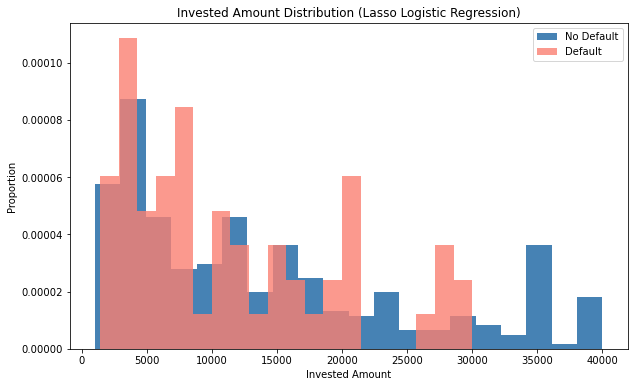

In [26]:
ax = no_default['invested_amount'].loc[no_default['default'] == 0].plot.hist(bins = 20, density = True, label='No Default', figsize = (10,6), color='steelblue')
ax = default['invested_amount'].loc[default['default'] == 1].plot.hist(bins = 20, density = True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)

ax.set_xlabel('Invested Amount')
ax.set_ylabel('Proportion')
ax.set_title('Invested Amount Distribution (Lasso Logistic Regression)')
ax.legend();

In [27]:
invested_by_state = pd.DataFrame(no_default.groupby("addr_state")["invested_amount"].sum())
invested_by_state = invested_by_state.rename(columns={'invested_amount': 'no_default_loans'})
invested_by_state['no_of_no_default'] = pd.DataFrame(no_default['addr_state'].value_counts())
invested_by_state['default_loans'] = pd.DataFrame(default.groupby("addr_state")["invested_amount"].sum())
invested_by_state["default_loans"].fillna(0, inplace = True)
invested_by_state['no_of_default'] = pd.DataFrame(default['addr_state'].value_counts())
invested_by_state["no_of_default"].fillna(0, inplace = True)
invested_by_state['sum']=invested_by_state['no_default_loans']+invested_by_state['default_loans']
invested_by_state = invested_by_state.sort_values(by=['sum'], ascending=False)
invested_by_state = invested_by_state.reset_index()

listOfSeries = [pd.Series(['AK', 0, 0, 0, 0, 0], index=invested_by_state .columns ) ,
                pd.Series(['DC', 0, 0, 0, 0, 0], index=invested_by_state .columns ) ,
                pd.Series(['DE', 0, 0, 0, 0, 0], index=invested_by_state .columns ), 
                pd.Series(['MT', 0, 0, 0, 0, 0], index=invested_by_state .columns ) ,
                pd.Series(['ND', 0, 0, 0, 0, 0], index=invested_by_state .columns ) ,
                pd.Series(['SD', 0, 0, 0, 0, 0], index=invested_by_state .columns ),
                pd.Series(['VT', 0, 0, 0, 0, 0], index=invested_by_state .columns ) ,
                pd.Series(['UT', 0, 0, 0, 0, 0], index=invested_by_state .columns ),]

invested_by_state = invested_by_state.append(listOfSeries , ignore_index=True)

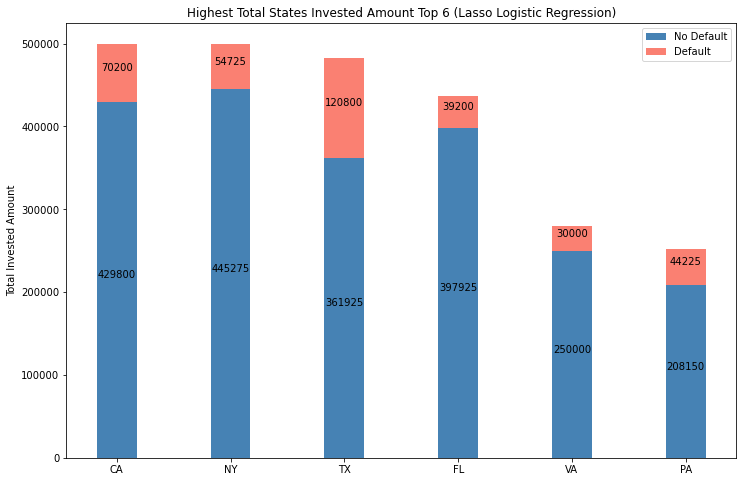

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

labels = np.array(invested_by_state.loc[0:5,'addr_state'])   
no_default_loans = np.array(invested_by_state.loc[0:5, 'no_default_loans'])   
default_loans = np.array(invested_by_state.loc[0:5, 'default_loans']) 

x = np.arange(len(labels))     # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(x, no_default_loans, width, color='steelblue')
p2 = plt.bar(x, default_loans, width,
             bottom=no_default_loans, color='salmon')

plt.ylabel('Total Invested Amount')
plt.title('Highest Total States Invested Amount Top 6 (Lasso Logistic Regression)')
plt.xticks(x,labels)
plt.legend((p1[0], p2[0]), ('No Default', 'Default'))

for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", fontsize=10)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", fontsize=10)

plt.show()

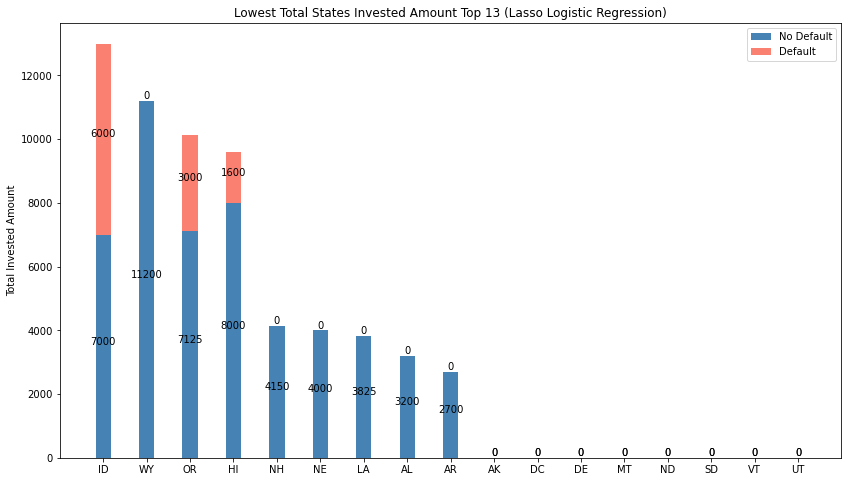

In [29]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 8))

labels = np.array(invested_by_state.loc[32:,'addr_state'])   
no_default_loans = np.array(invested_by_state.loc[32:, 'no_default_loans'])   
default_loans = np.array(invested_by_state.loc[32:, 'default_loans']) 

x = np.arange(len(labels))     # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(x, no_default_loans, width, color='steelblue')
p2 = plt.bar(x, default_loans, width,
             bottom=no_default_loans, color='salmon')

plt.ylabel('Total Invested Amount')
plt.title('Lowest Total States Invested Amount Top 13 (Lasso Logistic Regression)')
plt.xticks(x,labels)
plt.legend((p1[0], p2[0]), ('No Default', 'Default'))

for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", fontsize=10)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", fontsize=10)

plt.show()

In [30]:
invested_by_state['no_default_loans'].sum()

4346475.0

In [31]:
invested_by_state['default_loans'].sum()

653525.0

### Realized Return Distribution

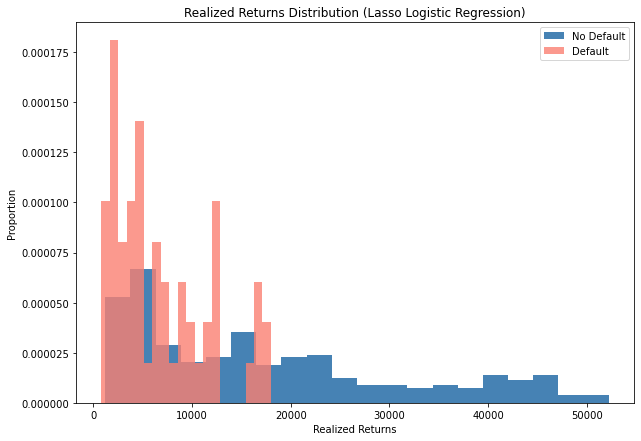

In [32]:
ax = no_default['realized_return'].plot.hist(bins = 20, density=True, label='No Default', figsize = (10,7), color='steelblue')
ax = default['not_realized_return'].plot.hist(bins = 20, density=True, label='Default', figsize = (10,7), color='salmon', alpha = 0.8)

ax.set_xlabel('Realized Returns')
ax.set_ylabel('Proportion')
ax.set_title('Realized Returns Distribution (Lasso Logistic Regression)')
ax.legend();

In [33]:
no_default['realized_return'].sum()

5414204.3025

In [34]:
default['not_realized_return'].sum()

392115.0

## XGBoost (Balanced + Grouped)

### Subtask 3

In [35]:
expected_rate_XGB_array = np.array(data_test['Expected_return_XGB'])   

In [36]:
m3 = Model("Portfolio optimizer") # creates an empty model

# Variables x1, x2, ..., x96745: Amount invested in each loan
amount_var = m3.addVars(96745, vtype=GRB.CONTINUOUS, name = 'Loan_amount')

# Set objective function
m3.setObjective(sum(amount_var[i]*(1+expected_rate_XGB_array[i]) for i in range(96745)), GRB.MAXIMIZE)

# Constraints: These follow the math formulation as described in lecture slides
# Total budget
m3.addConstr(sum(amount_var[i] for i in range(96745)) <= 5000000)

# Maximum loan amount
for i in range(96745):
    m3.addConstr(amount_var[i] <= loan_amnt_max[i], 'c2_2')
    m3.addConstr(amount_var[i] >= 0, 'c2_1')
    
# Diversification
total_state = [0] * 49
for i in range(49):
    for j in range(96745):
        total_state[i] = total_state[i] + amount_var[j]*state_data.iloc[j,i]
    m3.addConstr(total_state[i] <= 500000)

# Optimize model
try:
    m3.optimize()
except GurobiError: 
    print('Optimize failed due to non-convexity')

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 193540 rows, 96745 columns and 386980 nonzeros
Model fingerprint: 0xf6301a4f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 5e+06]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 0 rows and 96745 columns
Presolve time: 0.57s
Presolved: 96745 rows, 96795 columns, 290235 nonzeros


Barrier performed 0 iterations in 0.75 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 4 iterations and 0.76 seconds
Optimal objective  5.715975035e+06


In [37]:
money_invested = 0
for v in m3.getVars():
    money_invested += v.x
money_invested

5000000.0

In [38]:
print('Objective value: %g' % m3.objVal)

Objective value: 5.71598e+06


In [39]:
m3.printAttr('x')


    Variable            x 
-------------------------
Loan_amount[185]        12000 
Loan_amount[215]         1000 
Loan_amount[806]        16800 
Loan_amount[1566]        23250 
Loan_amount[2370]        20000 
Loan_amount[3451]        14000 
Loan_amount[3507]        12000 
Loan_amount[4080]        19950 
Loan_amount[4712]        24000 
Loan_amount[5374]         3200 
Loan_amount[5622]         4150 
Loan_amount[5644]        24000 
Loan_amount[6085]        12000 
Loan_amount[6226]        28000 
Loan_amount[6398]        21000 
Loan_amount[7029]         5000 
Loan_amount[7318]        26000 
Loan_amount[7396]        28000 
Loan_amount[7730]        13925 
Loan_amount[8123]        16800 
Loan_amount[8816]        10000 
Loan_amount[9267]        12000 
Loan_amount[9339]        25000 
Loan_amount[9942]        20000 
Loan_amount[10742]        23950 
Loan_amount[10798]        17000 
Loan_amount[10927]        28000 
Loan_amount[11328]        18000 
Loan_amount[11349]        18000 
Loan_amount[1183

### Subtask 4

In [40]:
var_names = []
var_values = []

for var in m3.getVars():
    if var.X >= 0: 
        var_names.append(str(var.varName))
        var_values.append(var.X)

In [41]:
value_dataset3 = pd.DataFrame(data=var_values)
value_dataset3 = value_dataset3.add_suffix('_X')
value_dataset3 = value_dataset3.rename(columns={'0_X': 'invested_amount'})
value_dataset3['default'] = output_XGB_bal_data['default']
value_dataset3['prob_default'] = output_XGB_bal_data['prob_default']
value_dataset3['expected_rate_of_return'] = output_XGB_bal_data['Expected_return']
value_dataset3['expected_return'] = (1+value_dataset3['expected_rate_of_return'])*value_dataset3['invested_amount']

In [42]:
def realized_return(row):
    if row['invested_amount'] > 0 and row['default'] == 0:
        return row['invested_amount']
    else:
        return 0

value_dataset3 = value_dataset3.assign(invested_amount_realized=value_dataset3.apply(realized_return, axis=1))
value_dataset3['int_rate'] = output_XGB_bal_data['int_rate']
value_dataset3['realized_return'] = (1+value_dataset3['int_rate'])*value_dataset3['invested_amount_realized']
value_dataset3['addr_state'] = data_test1['addr_state']
value_dataset3.iloc[20:30, :]

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return,addr_state
20,0.0,0,0.356557,-0.037723,0.0,0.0,0.1049,0.0,CA
21,0.0,0,0.421623,-0.063749,0.0,0.0,0.1049,0.0,NY
22,0.0,0,0.352021,-0.026908,0.0,0.0,0.1139,0.0,TX
23,0.0,0,0.356557,-0.072723,0.0,0.0,0.0699,0.0,AZ
24,0.0,0,0.352021,-0.068408,0.0,0.0,0.0724,0.0,TX
25,0.0,0,0.452626,0.073850,0.0,0.0,0.2549,0.0,CT
26,0.0,1,0.516076,-0.101530,0.0,0.0,0.1049,0.0,TX
27,0.0,0,0.398267,-0.024407,0.0,0.0,0.1349,0.0,WI
28,0.0,0,0.356557,-0.089423,0.0,0.0,0.0532,0.0,MT
29,0.0,0,0.571160,-0.068564,0.0,0.0,0.1599,0.0,NY


In [43]:
def not_realized_return(row):
    if row['invested_amount'] > 0 and row['default'] == 0:
        return 0
    else:
        return row['invested_amount']
value_dataset3 = value_dataset3.assign(invested_amount_not_realized=value_dataset3.apply(not_realized_return, axis=1))
value_dataset3['not_realized_return'] = (0.6)*value_dataset3['invested_amount_not_realized']
value_dataset3.iloc[20:30, :]

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return,addr_state,invested_amount_not_realized,not_realized_return
20,0.0,0,0.356557,-0.037723,0.0,0.0,0.1049,0.0,CA,0.0,0.0
21,0.0,0,0.421623,-0.063749,0.0,0.0,0.1049,0.0,NY,0.0,0.0
22,0.0,0,0.352021,-0.026908,0.0,0.0,0.1139,0.0,TX,0.0,0.0
23,0.0,0,0.356557,-0.072723,0.0,0.0,0.0699,0.0,AZ,0.0,0.0
24,0.0,0,0.352021,-0.068408,0.0,0.0,0.0724,0.0,TX,0.0,0.0
25,0.0,0,0.452626,0.073850,0.0,0.0,0.2549,0.0,CT,0.0,0.0
26,0.0,1,0.516076,-0.101530,0.0,0.0,0.1049,0.0,TX,0.0,0.0
27,0.0,0,0.398267,-0.024407,0.0,0.0,0.1349,0.0,WI,0.0,0.0
28,0.0,0,0.356557,-0.089423,0.0,0.0,0.0532,0.0,MT,0.0,0.0
29,0.0,0,0.571160,-0.068564,0.0,0.0,0.1599,0.0,NY,0.0,0.0


In [44]:
print('Numbers of invested loans: ' + str(sum(i > 0 for i in value_dataset3.invested_amount)))
print('Numbers of realized_return loans: ' + str(sum(i > 0 for i in value_dataset3.realized_return)))
print('Numbers of not_realized_return loans: ' + str(sum(i > 0 for i in value_dataset3.not_realized_return)))

Numbers of invested loans: 270
Numbers of realized_return loans: 207
Numbers of not_realized_return loans: 63


In [45]:
print('Expected return of portfolio: ' + str(round(m3.objVal, 2)))
print('Average expected return of portfolio: ' + str(round(m3.objVal/270, 3)))

print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round(value_dataset3['realized_return'].sum()+value_dataset3['not_realized_return'].sum(), 3)))
print('Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round((value_dataset3['realized_return'].sum()+value_dataset3['not_realized_return'].sum())/370, 2)))

Expected return of portfolio: 5715975.04
Average expected return of portfolio: 21170.278
Realized return of portfolio with original interest rate + (1-LGD)*not_realized: 5623735.892
Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: 15199.29


In [46]:
print('Expected return of portfolio (percentage point): ' + str(round(m3.objVal/money_invested, 6)))
print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): ' + str(round((value_dataset3['realized_return'].sum()+value_dataset3['not_realized_return'].sum())/money_invested, 6)))

Expected return of portfolio (percentage point): 1.143195
Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): 1.124747


In [47]:
def expected_return(row):
    if row['default'] == 0:
        return row['expected_return']
    else:
        return 0

value_dataset3 = value_dataset3.assign(expected_return_not_default=value_dataset3.apply(expected_return, axis=1))

def expected_return_default(row):
    if row['default'] == 0:
        return 0
    else:
        return row['expected_return']

value_dataset3 = value_dataset3.assign(expected_return_default=value_dataset3.apply(expected_return_default, axis=1))

### Expected Return Distribution

In [48]:
er = value_dataset3['expected_return_not_default']>0
expected_return = pd.DataFrame(value_dataset3[er])

erd = value_dataset3['expected_return_default']>0
expected_return_default = pd.DataFrame(value_dataset3[erd])

expected_return_default.iloc[20:30]

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return,addr_state,invested_amount_not_realized,not_realized_return,expected_return_not_default,expected_return_default
25943,20700.0,1,0.334720,0.174012,24302.051356,0.0,0.3079,0.0,CA,20700.0,12420.0,0.0,24302.051356
27299,15000.0,1,0.334720,0.128512,16927.682142,0.0,0.2624,0.0,MO,15000.0,9000.0,0.0,16927.682142
31309,22000.0,1,0.416795,0.141682,25117.005504,0.0,0.3084,0.0,TX,22000.0,13200.0,0.0,25117.005504
38676,20000.0,1,0.416795,0.140682,22813.641367,0.0,0.3074,0.0,FL,20000.0,12000.0,0.0,22813.641367
39821,25000.0,1,0.452626,0.127350,28183.742858,0.0,0.3084,0.0,CO,25000.0,15000.0,0.0,28183.742858
40273,21000.0,1,0.352021,0.154092,24235.925091,0.0,0.2949,0.0,TX,21000.0,12600.0,0.0,24235.925091
45542,15200.0,1,0.356557,0.157277,17590.611875,0.0,0.2999,0.0,MI,15200.0,9120.0,0.0,17590.611875
45703,28000.0,1,0.398267,0.145593,32076.611426,0.0,0.3049,0.0,NY,28000.0,16800.0,0.0,32076.611426
47784,10275.0,1,0.356557,0.165277,11973.222172,0.0,0.3079,0.0,MO,10275.0,6165.0,0.0,11973.222172
49608,30725.0,1,0.356557,0.157277,35557.338806,0.0,0.2999,0.0,NE,30725.0,18435.0,0.0,35557.338806


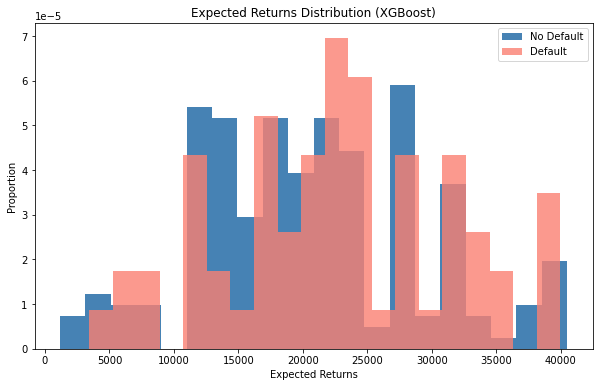

In [49]:
ax = expected_return['expected_return_not_default'].loc[expected_return['default'] == 0].plot.hist(bins = 20, density = True, label='No Default', figsize = (10,6), color='steelblue')
ax = expected_return_default['expected_return_default'].loc[expected_return_default['default'] == 1].plot.hist(bins = 20, density = True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)

ax.set_xlabel('Expected Returns')
ax.set_ylabel('Proportion')
ax.set_title('Expected Returns Distribution (XGBoost)')
ax.legend()

### Invested Amount Distribution

In [50]:
no_defa = value_dataset3['default']==0
no_default = value_dataset3[no_defa]
defa = value_dataset3['default']==1
default = value_dataset3[defa]

In [51]:
no_default = no_default[no_default.invested_amount != 0] 
default = default[default.invested_amount != 0] 

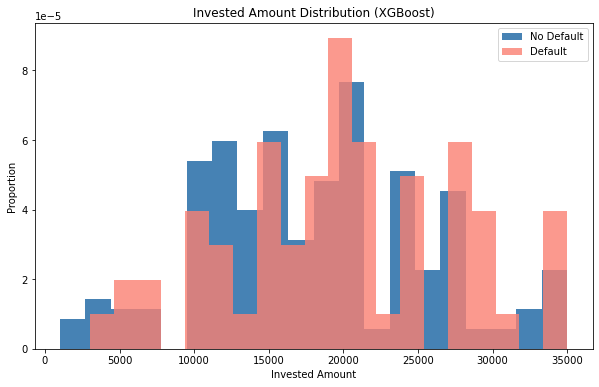

In [52]:
ax = no_default['invested_amount'].loc[no_default['default'] == 0].plot.hist(bins = 20, density = True, label='No Default', figsize = (10,6), color='steelblue')
ax = default['invested_amount'].loc[default['default'] == 1].plot.hist(bins = 20, density = True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)

ax.set_xlabel('Invested Amount')
ax.set_ylabel('Proportion')
ax.set_title('Invested Amount Distribution (XGBoost)')
ax.legend();

In [53]:
invested_by_state = pd.DataFrame(no_default.groupby("addr_state")["invested_amount"].sum())
invested_by_state = invested_by_state.rename(columns={'invested_amount': 'no_default_loans'})
invested_by_state['no_of_no_default'] = pd.DataFrame(no_default['addr_state'].value_counts())
invested_by_state['default_loans'] = pd.DataFrame(default.groupby("addr_state")["invested_amount"].sum())
invested_by_state["default_loans"].fillna(0, inplace = True)
invested_by_state['no_of_default'] = pd.DataFrame(default['addr_state'].value_counts())
invested_by_state["no_of_default"].fillna(0, inplace = True)
invested_by_state['sum']=invested_by_state['no_default_loans']+invested_by_state['default_loans']
invested_by_state = invested_by_state.sort_values(by=['sum'], ascending=False)
invested_by_state = invested_by_state.reset_index()

listOfSeries = [pd.Series(['AR, DE, HI, OK, ME, MT, NE, SD, VT, WY', 0, 0, 0, 0, 0], index=invested_by_state .columns )]

invested_by_state = invested_by_state.append(listOfSeries , ignore_index=True)

invested_by_state

,addr_state,no_default_loans,no_of_no_default,default_loans,no_of_default,sum
0,TX,417350.0,22,82650.0,5.0,500000.0
1,CA,327400.0,18,172600.0,9.0,500000.0
2,NY,323400.0,19,115500.0,4.0,438900.0
3,FL,234850.0,15,167825.0,8.0,402675.0
4,VA,190950.0,9,47525.0,2.0,238475.0
5,IL,128900.0,7,73425.0,3.0,202325.0
6,AZ,156275.0,9,38000.0,2.0,194275.0
7,MI,124625.0,6,68050.0,4.0,192675.0
8,GA,78625.0,5,99800.0,4.0,178425.0
9,NV,144875.0,7,28800.0,1.0,173675.0


In [54]:
invested_by_state['no_default_loans'].sum()

3744950.0

In [55]:
invested_by_state['default_loans'].sum()

1224325.0

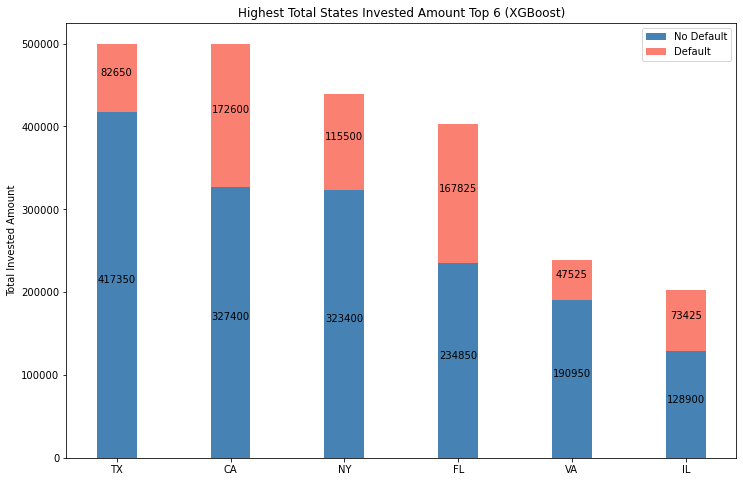

In [56]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

labels = np.array(invested_by_state.loc[0:5,'addr_state'])   
no_default_loans = np.array(invested_by_state.loc[0:5, 'no_default_loans'])   
default_loans = np.array(invested_by_state.loc[0:5, 'default_loans']) 

x = np.arange(len(labels))     # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(x, no_default_loans, width, color='steelblue')
p2 = plt.bar(x, default_loans, width,
             bottom=no_default_loans, color='salmon')

plt.ylabel('Total Invested Amount')
plt.title('Highest Total States Invested Amount Top 6 (XGBoost)')
plt.xticks(x,labels)
plt.legend((p1[0], p2[0]), ('No Default', 'Default'))

for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", fontsize=10)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", fontsize=10)

plt.show()

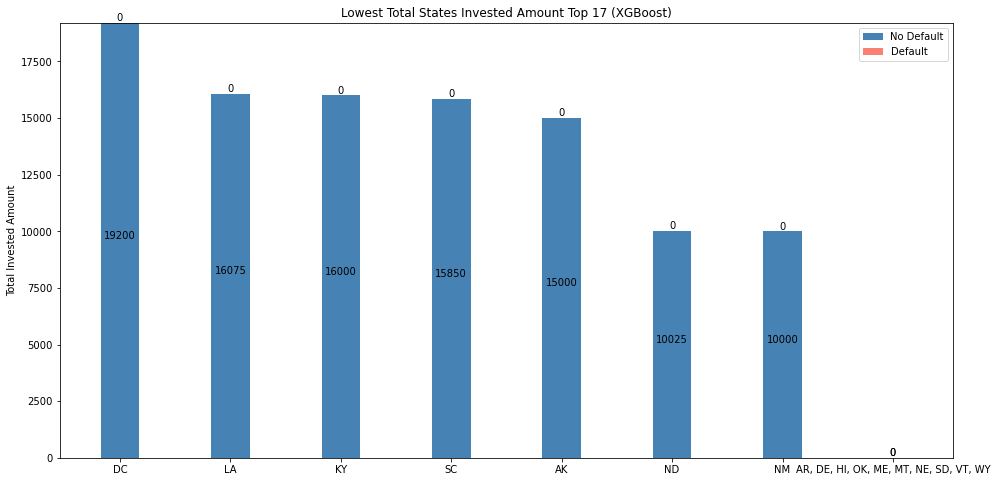

In [57]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))

labels = np.array(invested_by_state.loc[32:,'addr_state'])   
no_default_loans = np.array(invested_by_state.loc[32:, 'no_default_loans'])   
default_loans = np.array(invested_by_state.loc[32:, 'default_loans']) 

x = np.arange(len(labels))     # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(x, no_default_loans, width, color='steelblue')
p2 = plt.bar(x, default_loans, width,
             bottom=no_default_loans, color='salmon')

plt.ylabel('Total Invested Amount')
plt.title('Lowest Total States Invested Amount Top 17 (XGBoost)')
plt.xticks(x,labels)
plt.legend((p1[0], p2[0]), ('No Default', 'Default'))

for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", fontsize=10)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", fontsize=10)

plt.show()

### Realized Return Distribution

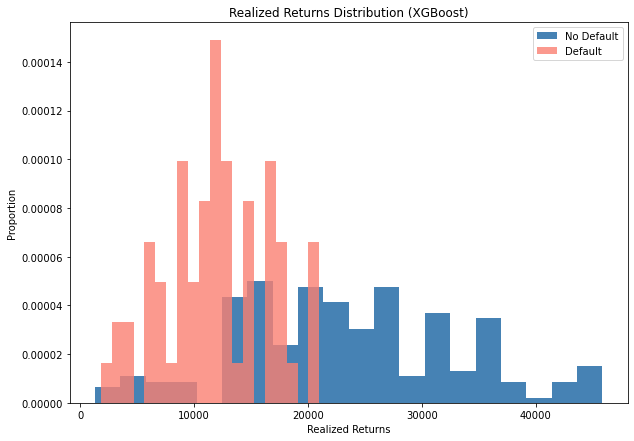

In [58]:
ax = no_default['realized_return'].plot.hist(bins = 20, density=True, label='No Default', figsize = (10,7), color='steelblue')
ax = default['not_realized_return'].plot.hist(bins = 20, density=True, label='Default', figsize = (10,7), color='salmon', alpha = 0.8)

ax.set_xlabel('Realized Returns')
ax.set_ylabel('Proportion')
ax.set_title('Realized Returns Distribution (XGBoost)')
ax.legend();

In [59]:
no_default['realized_return'].sum()

4870705.8925

In [60]:
default['not_realized_return'].sum()

753030.0

## Random Forest (Balanced + Grouped)

### Subtask 3

In [61]:
expected_rate_RF_array = np.array(data_test['Expected_return_RF'])    

In [62]:
m1 = Model("Portfolio optimizer") # creates an empty model

# Variables x1, x2, ..., x96745: Amount invested in each loan
amount_var = m1.addVars(96745, vtype=GRB.CONTINUOUS, name = 'Loan_amount')

# Set objective function
m1.setObjective(sum(amount_var[i]*(1+expected_rate_RF_array[i]) for i in range(96745)), GRB.MAXIMIZE)

# Constraints: These follow the math formulation as described in lecture slides
# Total budget
m1.addConstr(sum(amount_var[i] for i in range(96745)) <= 5000000)

# Maximum loan amount
for i in range(96745):
    m1.addConstr(amount_var[i] <= loan_amnt_max[i], 'c2_2')
    m1.addConstr(amount_var[i] >= 0, 'c2_1')
    
# Diversification
total_state = [0] * 49
for i in range(49):
    for j in range(96745):
        total_state[i] = total_state[i] + amount_var[j]*state_data.iloc[j,i]
    m1.addConstr(total_state[i] <= 500000)

# Optimize model
try:
    m1.optimize()
except GurobiError: 
    print('Optimize failed due to non-convexity')

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 193540 rows, 96745 columns and 386980 nonzeros
Model fingerprint: 0xb30b0c1a
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 5e+06]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 0 rows and 96745 columns
Presolve time: 0.53s
Presolved: 96745 rows, 96795 columns, 290235 nonzeros


Barrier performed 0 iterations in 0.89 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 4 iterations and 0.90 seconds
Optimal objective  5.637138744e+06


In [63]:
money_invested = 0
for v in m1.getVars():
    money_invested += v.x
money_invested

5000000.0

In [64]:
print('Objective value: %g' % m1.objVal)

Objective value: 5.63714e+06


In [65]:
m1.printAttr('x')


    Variable            x 
-------------------------
Loan_amount[215]         1000 
Loan_amount[806]        16800 
Loan_amount[1566]        23250 
Loan_amount[3451]        14000 
Loan_amount[3611]        25000 
Loan_amount[4080]        19950 
Loan_amount[4712]        24000 
Loan_amount[5374]         3200 
Loan_amount[5622]         4150 
Loan_amount[5644]        24000 
Loan_amount[6085]        12000 
Loan_amount[6775]        24000 
Loan_amount[7029]         5000 
Loan_amount[7318]        26000 
Loan_amount[7396]        28000 
Loan_amount[7615]        16050 
Loan_amount[7730]        13925 
Loan_amount[8123]        16800 
Loan_amount[8816]        10000 
Loan_amount[9114]        11025 
Loan_amount[9267]        12000 
Loan_amount[9339]        25000 
Loan_amount[9800]        31650 
Loan_amount[9942]        20000 
Loan_amount[10740]        12600 
Loan_amount[10742]        23950 
Loan_amount[10927]        28000 
Loan_amount[11020]        16000 
Loan_amount[11328]        18000 
Loan_amount[113

### Subtask 4

In [66]:
var_names1 = []
var_values1 = []

for var in m1.getVars():
    if var.X >= 0: 
        var_names1.append(str(var.varName))
        var_values1.append(var.X)

In [67]:
value_dataset1 = pd.DataFrame(data=var_values1)
value_dataset1 = value_dataset1.add_suffix('_X')
value_dataset1 = value_dataset1.rename(columns={'0_X': 'invested_amount'})
value_dataset1['default'] = output_rf_bal_data['default']
value_dataset1['prob_default'] = output_rf_bal_data['prob_default']
value_dataset1['expected_rate_of_return'] = output_rf_bal_data['Expected_return']
value_dataset1['expected_return'] = (1+value_dataset1['expected_rate_of_return'])*value_dataset1['invested_amount']

In [68]:
def realized_return(row):
    if row['invested_amount'] > 0 and row['default'] == 0:
        return row['invested_amount']
    else:
        return 0

value_dataset1 = value_dataset1.assign(invested_amount_realized=value_dataset1.apply(realized_return, axis=1))
value_dataset1['int_rate'] = output_rf_bal_data['int_rate']
#value_dataset['realized_return'] = value_dataset['expected_rate_of_return']*value_dataset['invested_amount_realized']
value_dataset1['realized_return'] = (1+value_dataset1['int_rate'])*value_dataset1['invested_amount_realized']
value_dataset1['addr_state'] = data_test1['addr_state']
value_dataset1.iloc[210:220, :]

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return,addr_state
210,0.0,0,0.470328,-0.053231,0.000000,0.0,0.1349,0.0,MI
211,0.0,0,0.448057,-0.019323,0.000000,0.0,0.1599,0.0,VA
212,0.0,0,0.533010,-0.073304,0.000000,0.0,0.1399,0.0,UT
213,0.0,0,0.418316,-0.084926,0.000000,0.0,0.0824,0.0,CA
214,0.0,0,0.407717,-0.035687,0.000000,0.0,0.1274,0.0,FL
215,1000.0,0,0.407926,0.136730,1136.729565,1000.0,0.2999,1299.9,TX
216,0.0,0,0.526305,-0.096622,0.000000,0.0,0.1139,0.0,CA
217,0.0,0,0.372722,0.010811,0.000000,0.0,0.1599,0.0,IN
218,0.0,0,0.429479,-0.036891,0.000000,0.0,0.1349,0.0,FL
219,0.0,0,0.511458,-0.099683,0.000000,0.0,0.1049,0.0,CA


In [69]:
def not_realized_return(row):
    if row['invested_amount'] > 0 and row['default'] == 0:
        return 0
    else:
        return row['invested_amount']
value_dataset1 = value_dataset1.assign(invested_amount_not_realized=value_dataset1.apply(not_realized_return, axis=1))
value_dataset1['not_realized_return'] = (0.6)*value_dataset1['invested_amount_not_realized']

In [70]:
print('Numbers of invested loans: ' + str(sum(i > 0 for i in value_dataset1.invested_amount)))
print('Numbers of realized_return loans: ' + str(sum(i > 0 for i in value_dataset1.realized_return)))
print('Numbers of not_realized_return loans: ' + str(sum(i > 0 for i in value_dataset1.not_realized_return)))

Numbers of invested loans: 270
Numbers of realized_return loans: 206
Numbers of not_realized_return loans: 64


In [71]:
print('Expected return of portfolio: ' + str(round(m1.objVal, 2)))
print('Average expected return of portfolio: ' + str(round(m1.objVal/sum(i > 0 for i in value_dataset1.invested_amount), 2)))
print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round(value_dataset1['realized_return'].sum()+value_dataset1['not_realized_return'].sum(), 2)))
print('Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round((value_dataset1['realized_return'].sum()+value_dataset1['not_realized_return'].sum())/270, 2)))

Expected return of portfolio: 5637138.74
Average expected return of portfolio: 20878.29
Realized return of portfolio with original interest rate + (1-LGD)*not_realized: 5632770.96
Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: 20862.11


In [72]:
print('Expected return of portfolio (percentage point): ' + str(round(m1.objVal/money_invested, 6)))
print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): ' + str(round((value_dataset1['realized_return'].sum()+value_dataset1['not_realized_return'].sum())/money_invested, 6)))

Expected return of portfolio (percentage point): 1.127428
Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): 1.126554


In [73]:
def expected_return(row):
    if row['default'] == 0:
        return row['expected_return']
    else:
        return 0

value_dataset1 = value_dataset1.assign(expected_return_not_default=value_dataset1.apply(expected_return, axis=1))

def expected_return_default(row):
    if row['default'] == 0:
        return 0
    else:
        return row['expected_return']

value_dataset1 = value_dataset1.assign(expected_return_default=value_dataset1.apply(expected_return_default, axis=1))

### Expected Return Distribution

In [74]:
er = value_dataset1['expected_return_not_default']>0
expected_return = pd.DataFrame(value_dataset1[er])

erd = value_dataset1['expected_return_default']>0
expected_return_default = pd.DataFrame(value_dataset1[erd])

expected_return_default.iloc[20:30]

,invested_amount,default,prob_default,expected_rate_of_return,expected_return,invested_amount_realized,int_rate,realized_return,addr_state,invested_amount_not_realized,not_realized_return,expected_return_not_default,expected_return_default
20366,3000.0,1,0.457246,0.125502,3376.504652,0.0,0.3084,0.0,AZ,3000.0,1800.0,0.0,3376.504652
25943,20700.0,1,0.400371,0.147751,23758.454309,0.0,0.3079,0.0,CA,20700.0,12420.0,0.0,23758.454309
29275,8975.0,1,0.426400,0.124340,10090.951104,0.0,0.2949,0.0,MO,8975.0,5385.0,0.0,10090.951104
29501,7475.0,1,0.475465,0.117214,8351.173596,0.0,0.3074,0.0,AR,7475.0,4485.0,0.0,8351.173596
31309,22000.0,1,0.443981,0.130808,24877.765736,0.0,0.3084,0.0,TX,22000.0,13200.0,0.0,24877.765736
38676,20000.0,1,0.436400,0.132840,22656.798622,0.0,0.3074,0.0,FL,20000.0,12000.0,0.0,22656.798622
40273,21000.0,1,0.401150,0.134440,23823.236137,0.0,0.2949,0.0,TX,21000.0,12600.0,0.0,23823.236137
45542,15200.0,1,0.408436,0.136526,17275.191610,0.0,0.2999,0.0,MI,15200.0,9120.0,0.0,17275.191610
45703,28000.0,1,0.426969,0.134112,31755.146143,0.0,0.3049,0.0,NY,28000.0,16800.0,0.0,31755.146143
47784,10275.0,1,0.402713,0.146815,11783.522874,0.0,0.3079,0.0,MO,10275.0,6165.0,0.0,11783.522874


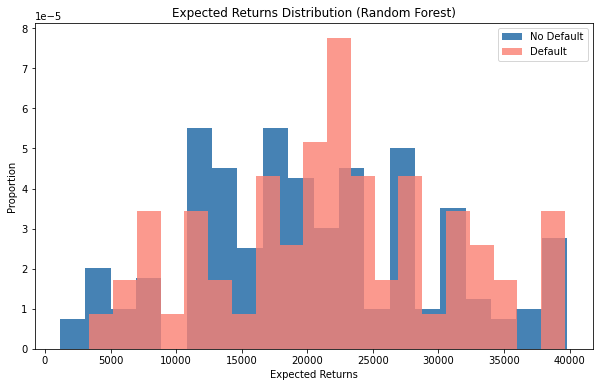

In [75]:
ax = expected_return['expected_return_not_default'].loc[expected_return['default'] == 0].plot.hist(bins = 20, density = True, label='No Default', figsize = (10,6), color='steelblue')
ax = expected_return_default['expected_return_default'].loc[expected_return_default['default'] == 1].plot.hist(bins = 20, density = True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)

ax.set_xlabel('Expected Returns')
ax.set_ylabel('Proportion')
ax.set_title('Expected Returns Distribution (Random Forest)')
ax.legend()

### Invested Amount Distribution

In [76]:
no_defa = value_dataset1['default']==0
no_default = value_dataset1[no_defa]
defa = value_dataset1['default']==1
default = value_dataset1[defa]

In [77]:
no_default = no_default[no_default.invested_amount != 0] 
default = default[default.invested_amount != 0] 

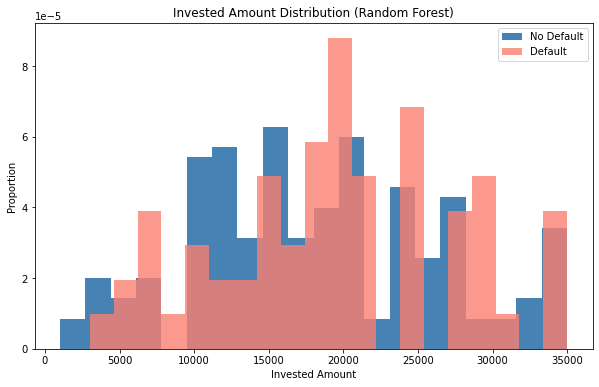

In [78]:
ax = no_default['invested_amount'].loc[no_default['default'] == 0].plot.hist(bins = 20, density=True, label='No Default', figsize = (10,6), color='steelblue')
ax = default['invested_amount'].loc[default['default'] == 1].plot.hist(bins = 20, density=True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)

ax.set_xlabel('Invested Amount')
ax.set_ylabel('Proportion')
ax.set_title('Invested Amount Distribution (Random Forest)')
ax.legend();

In [79]:
invested_by_state = pd.DataFrame(no_default.groupby("addr_state")["invested_amount"].sum())
invested_by_state = invested_by_state.rename(columns={'invested_amount': 'no_default_loans'})
invested_by_state['no_of_no_default'] = pd.DataFrame(no_default['addr_state'].value_counts())
invested_by_state['default_loans'] = pd.DataFrame(default.groupby("addr_state")["invested_amount"].sum())
invested_by_state["default_loans"].fillna(0, inplace = True)
invested_by_state['no_of_default'] = pd.DataFrame(default['addr_state'].value_counts())
invested_by_state["no_of_default"].fillna(0, inplace = True)
invested_by_state['sum']=invested_by_state['no_default_loans']+invested_by_state['default_loans']
invested_by_state = invested_by_state.sort_values(by=['sum'], ascending=False)
invested_by_state = invested_by_state.reset_index()

listOfSeries = [pd.Series(['AK, HI, ME, MT, NE, NH, WY, SD, VT', 0, 0, 0, 0, 0], index=invested_by_state .columns )]

invested_by_state = invested_by_state.append(listOfSeries , ignore_index=True)
invested_by_state

,addr_state,no_default_loans,no_of_no_default,default_loans,no_of_default,sum
0,CA,309400.0,17,190600.0,10.0,500000.0
1,TX,404225.0,21,95775.0,6.0,500000.0
2,FL,225725.0,15,167825.0,8.0,393550.0
3,IL,288900.0,15,86025.0,4.0,374925.0
4,MI,257525.0,14,92050.0,5.0,349575.0
5,NY,219000.0,13,104250.0,4.0,323250.0
6,OH,220125.0,11,24000.0,1.0,244125.0
7,GA,89650.0,6,99800.0,4.0,189450.0
8,VA,152200.0,7,24900.0,1.0,177100.0
9,NJ,116400.0,6,47750.0,2.0,164150.0


In [80]:
invested_by_state['no_default_loans'].sum()

3750200.0

In [81]:
invested_by_state['default_loans'].sum()

1219075.0

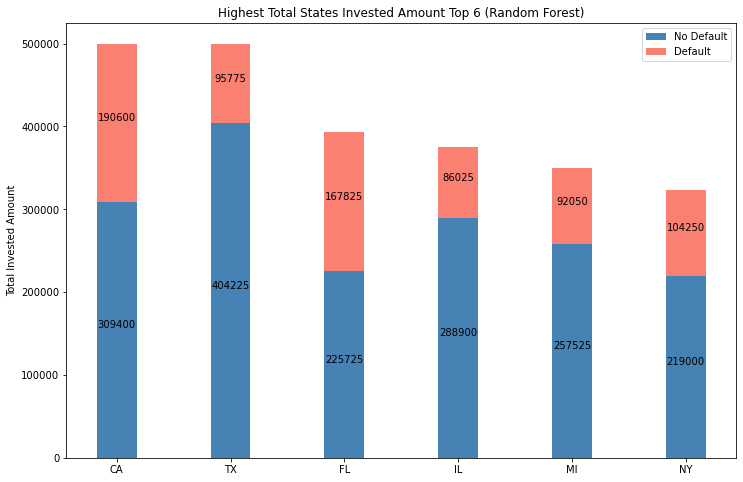

In [82]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))

labels = np.array(invested_by_state.loc[0:5,'addr_state'])   
no_default_loans = np.array(invested_by_state.loc[0:5, 'no_default_loans'])   
default_loans = np.array(invested_by_state.loc[0:5, 'default_loans']) 

x = np.arange(len(labels))     # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(x, no_default_loans, width, color='steelblue')
p2 = plt.bar(x, default_loans, width,
             bottom=no_default_loans, color='salmon')

plt.ylabel('Total Invested Amount')
plt.title('Highest Total States Invested Amount Top 6 (Random Forest)')
plt.xticks(x,labels)
plt.legend((p1[0], p2[0]), ('No Default', 'Default'))

for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", fontsize=10)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", fontsize=10)

plt.show()

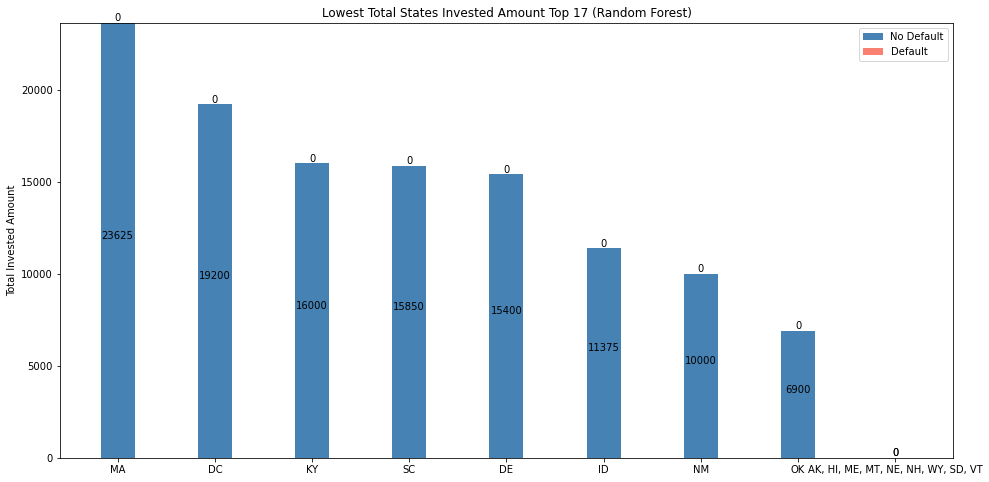

In [83]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))

labels = np.array(invested_by_state.loc[32:,'addr_state'])   
no_default_loans = np.array(invested_by_state.loc[32:, 'no_default_loans'])   
default_loans = np.array(invested_by_state.loc[32:, 'default_loans']) 

x = np.arange(len(labels))     # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(x, no_default_loans, width, color='steelblue')
p2 = plt.bar(x, default_loans, width,
             bottom=no_default_loans, color='salmon')

plt.ylabel('Total Invested Amount')
plt.title('Lowest Total States Invested Amount Top 17 (Random Forest)')
plt.xticks(x,labels)
plt.legend((p1[0], p2[0]), ('No Default', 'Default'))

for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="bottom", fontsize=10)
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="bottom", fontsize=10)

plt.show()

### Realized Return Distribution

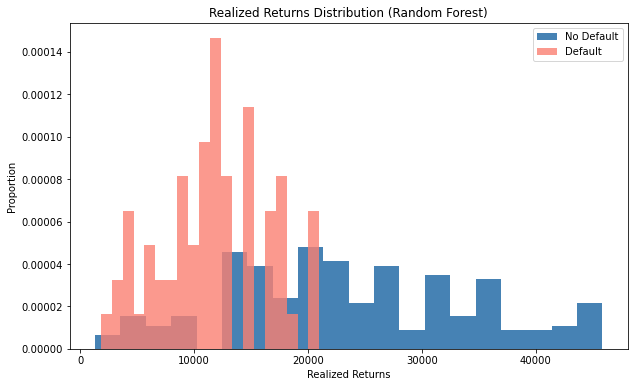

In [84]:
ax = no_default['realized_return'].plot.hist(bins = 20, density=True, label='No Default', figsize = (10,6), color='steelblue')
ax = default['not_realized_return'].plot.hist(bins = 20, density=True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)

ax.set_xlabel('Realized Returns')
ax.set_ylabel('Proportion')
ax.set_title('Realized Returns Distribution (Random Forest)')
ax.legend();

## Baseline

### Subtask 3

In [85]:
output_baseline = pd.read_csv('output_baseline.csv')
expected_rate_baseline_array = np.array(output_baseline['Expected_return'])

In [86]:
m2 = Model("Baseline optimizer") # creates an empty model

# Variables x1, x2, ..., x96745: Amount invested in each loan
amount_var = m2.addVars(96745, vtype=GRB.CONTINUOUS, name = 'Loan_amount')

# Set objective function
m2.setObjective(sum(amount_var[i]*(1+expected_rate_baseline_array[i]) for i in range(96745)), GRB.MAXIMIZE)

# Constraints: These follow the math formulation as described in lecture slides
# Total budget
m2.addConstr(sum(amount_var[i] for i in range(96745)) <= 5000000)

# Maximum loan amount
for i in range(96745):
    m2.addConstr(amount_var[i] <= loan_amnt_max[i], 'c2_2')
    m2.addConstr(amount_var[i] >= 0, 'c2_1')
    
# Diversification
total_state = [0] * 49
for i in range(49):
    for j in range(96745):
        total_state[i] = total_state[i] + amount_var[j]*state_data.iloc[j,i]
    m2.addConstr(total_state[i] <= 500000)

# Optimize model
try:
    m2.optimize()
except GurobiError: 
    print('Optimize failed due to non-convexity')

Gurobi Optimizer version 9.0.1 build v9.0.1rc0 (win64)
Optimize a model with 193540 rows, 96745 columns and 386980 nonzeros
Model fingerprint: 0xdc6c9899
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [9e-01, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 5e+06]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 0 rows and 96745 columns
Presolve time: 0.66s
Presolved: 96745 rows, 96795 columns, 290235 nonzeros


Solved with dual simplex
Solved in 8 iterations and 1.15 seconds
Optimal objective  5.546474875e+06


In [87]:
m2.printAttr('x')


    Variable            x 
-------------------------
Loan_amount[568]        35000 
Loan_amount[1955]        13300 
Loan_amount[3406]        20000 
Loan_amount[3507]        12000 
Loan_amount[6052]        18000 
Loan_amount[6398]        21000 
Loan_amount[6661]        30000 
Loan_amount[7016]        17400 
Loan_amount[7665]        27000 
Loan_amount[7730]        13925 
Loan_amount[7893]        14375 
Loan_amount[7943]        35000 
Loan_amount[8123]        16800 
Loan_amount[8599]        23950 
Loan_amount[8816]        10000 
Loan_amount[9093]         8000 
Loan_amount[9114]        11025 
Loan_amount[9123]        11375 
Loan_amount[9463]        20000 
Loan_amount[9630]        35000 
Loan_amount[9722]        28000 
Loan_amount[10742]        23950 
Loan_amount[10747]        33750 
Loan_amount[10950]         9000 
Loan_amount[11132]        30000 
Loan_amount[11832]        25000 
Loan_amount[12475]        35000 
Loan_amount[12994]        18000 
Loan_amount[13516]        24000 
Loan_amount

In [88]:
print('Objective value: %g' % m.objVal)

Objective value: 5.54956e+06


In [89]:
money_invested = 0
for v in m2.getVars():
    money_invested += v.x
money_invested

5000000.0

### Subtask 4

In [90]:
var_names_no_prob = []
var_values_no_prob = []

for var in m2.getVars():
    if var.X >= 0: 
        var_names_no_prob.append(str(var.varName))
        var_values_no_prob.append(var.X)

In [91]:
value_dataset2 = pd.DataFrame(data=var_values_no_prob)
value_dataset2 = value_dataset2.add_suffix('_X')
value_dataset2 = value_dataset2.rename(columns={'0_X': 'invested_amount_no_prob'})
value_dataset2['default'] = output_lr_l1_bal['default']
value_dataset2['prob_default'] = output_baseline['prob_default']
value_dataset2['expected_rate_of_return'] = output_baseline['Expected_return']
value_dataset2['expected_return'] = (1+value_dataset2['expected_rate_of_return'])*value_dataset2['invested_amount_no_prob']

In [92]:
def realized_return_no_prob(row):
    if row['invested_amount_no_prob'] > 0 and row['default'] == 0:
        return row['invested_amount_no_prob']
    else:
        return 0

value_dataset2 = value_dataset2.assign(invested_amount_no_prob_realized=value_dataset2.apply(realized_return_no_prob, axis=1))
value_dataset2['int_rate'] = output_baseline['int_rate']
value_dataset2['no_prob_realized_return'] = (1+value_dataset2['int_rate'])*value_dataset2['invested_amount_no_prob_realized']
value_dataset2['addr_state'] = data_test1['addr_state']
value_dataset2.iloc[120:130, :]

,invested_amount_no_prob,default,prob_default,expected_rate_of_return,expected_return,invested_amount_no_prob_realized,int_rate,no_prob_realized_return,addr_state
120,0.0,0,0.5,-0.0651,0.0,0.0,0.1349,0.0,TX
121,0.0,0,0.5,-0.0651,0.0,0.0,0.1349,0.0,CA
122,0.0,0,0.5,-0.0401,0.0,0.0,0.1599,0.0,HI
123,0.0,0,0.5,-0.0726,0.0,0.0,0.1274,0.0,TX
124,0.0,0,0.5,-0.1468,0.0,0.0,0.0532,0.0,TX
125,0.0,0,0.5,-0.1251,0.0,0.0,0.0749,0.0,MO
126,0.0,0,0.5,0.1084,0.0,0.0,0.3084,0.0,CO
127,0.0,0,0.5,-0.0851,0.0,0.0,0.1149,0.0,IL
128,0.0,0,0.5,-0.0861,0.0,0.0,0.1139,0.0,CA
129,0.0,0,0.5,-0.0601,0.0,0.0,0.1399,0.0,CA


In [93]:
def not_realized_return_no_prob(row):
    if row['invested_amount_no_prob'] > 0 and row['default'] == 0:
        return 0
    else:
        return row['invested_amount_no_prob']
value_dataset2 = value_dataset2.assign(invested_amount_no_prob_not_realized=value_dataset2.apply(not_realized_return_no_prob, axis=1))
value_dataset2['no_prob_not_realized_return'] = (0.6)*value_dataset2['invested_amount_no_prob_not_realized']

In [94]:
print('Numbers of invested loans (no probability): ' + str(sum(i > 0 for i in value_dataset2.invested_amount_no_prob)))
print('Numbers of realized_return loans (no probability): ' + str(sum(i > 0 for i in value_dataset2.invested_amount_no_prob_realized)))
print('Numbers of not_realized_return loans (no probability): ' + str(sum(i > 0 for i in value_dataset2.invested_amount_no_prob_not_realized)))

Numbers of invested loans (no probability): 244
Numbers of realized_return loans (no probability): 172
Numbers of not_realized_return loans (no probability): 72


In [95]:
print('Expected return of portfolio: ' + str(round(m2.objVal, 2)))
print('Average expected return of portfolio: ' + str(round(m2.objVal/244, 2)))

print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round(value_dataset2['no_prob_realized_return'].sum()+value_dataset2['no_prob_not_realized_return'].sum(), 3)))
print('Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round((value_dataset2['no_prob_realized_return'].sum()+value_dataset2['no_prob_not_realized_return'].sum())/244, 2)))

Expected return of portfolio: 5546474.87
Average expected return of portfolio: 22731.45
Realized return of portfolio with original interest rate + (1-LGD)*not_realized: 5482295.722
Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: 22468.43


In [96]:
print('Expected return of portfolio (percentage point): ' + str(round(m2.objVal/money_invested, 6)))
print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): ' + str(round((value_dataset2['no_prob_realized_return'].sum()+value_dataset2['no_prob_not_realized_return'].sum())/money_invested, 6)))

Expected return of portfolio (percentage point): 1.109295
Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): 1.096459


In [97]:
def expected_return(row):
    if row['default'] == 0:
        return row['expected_return']
    else:
        return 0

value_dataset2 = value_dataset2.assign(expected_return_not_default=value_dataset2.apply(expected_return, axis=1))

def expected_return_default(row):
    if row['default'] == 0:
        return 0
    else:
        return row['expected_return']

value_dataset2 = value_dataset2.assign(expected_return_default=value_dataset2.apply(expected_return_default, axis=1))

### Expected Return Distribution

In [98]:
er = value_dataset2['expected_return_not_default']>0
expected_return = pd.DataFrame(value_dataset2[er])

erd = value_dataset2['expected_return_default']>0
expected_return_default = pd.DataFrame(value_dataset2[erd])

expected_return_default.iloc[20:30]

,invested_amount_no_prob,default,prob_default,expected_rate_of_return,expected_return,invested_amount_no_prob_realized,int_rate,no_prob_realized_return,addr_state,invested_amount_no_prob_not_realized,no_prob_not_realized_return,expected_return_not_default,expected_return_default
23520,16000.0,1,0.5,0.1094,17750.40,0.0,0.3094,0.0,OH,16000.0,9600.0,0.0,17750.40
23569,10000.0,1,0.5,0.1099,11099.00,0.0,0.3099,0.0,PA,10000.0,6000.0,0.0,11099.00
23699,30000.0,1,0.5,0.1099,33297.00,0.0,0.3099,0.0,FL,30000.0,18000.0,0.0,33297.00
24456,19800.0,1,0.5,0.1084,21946.32,0.0,0.3084,0.0,LA,19800.0,11880.0,0.0,21946.32
25569,32200.0,1,0.5,0.1084,35690.48,0.0,0.3084,0.0,NC,32200.0,19320.0,0.0,35690.48
26064,16000.0,1,0.5,0.1099,17758.40,0.0,0.3099,0.0,AL,16000.0,9600.0,0.0,17758.40
28055,32000.0,1,0.5,0.1099,35516.80,0.0,0.3099,0.0,PA,32000.0,19200.0,0.0,35516.80
33325,15000.0,1,0.5,0.1099,16648.50,0.0,0.3099,0.0,CO,15000.0,9000.0,0.0,16648.50
33982,18000.0,1,0.5,0.1089,19960.20,0.0,0.3089,0.0,GA,18000.0,10800.0,0.0,19960.20
34660,30000.0,1,0.5,0.1089,33267.00,0.0,0.3089,0.0,SD,30000.0,18000.0,0.0,33267.00


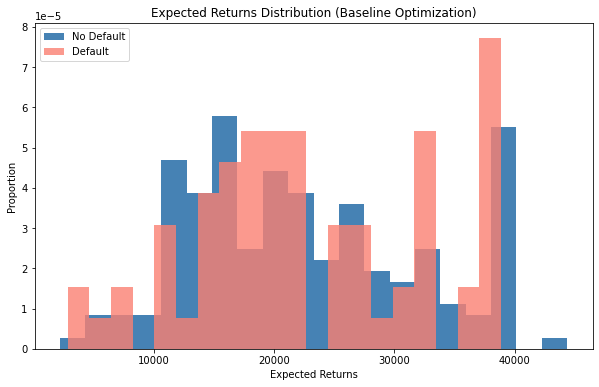

In [99]:
ax = expected_return['expected_return_not_default'].loc[expected_return['default'] == 0].plot.hist(bins = 20, density = True, label='No Default', figsize = (10,6), color='steelblue')
ax = expected_return_default['expected_return_default'].loc[expected_return_default['default'] == 1].plot.hist(bins = 20, density = True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)

ax.set_xlabel('Expected Returns')
ax.set_ylabel('Proportion')
ax.set_title('Expected Returns Distribution (Baseline Optimization)')
ax.legend()

### Invested Amount Distribution

In [100]:
no_defa = value_dataset2['default']==0
no_default = value_dataset2[no_defa]
defa = value_dataset2['default']==1
default = value_dataset2[defa]

In [101]:
no_default = no_default[no_default.invested_amount_no_prob != 0] 
default = default[default.invested_amount_no_prob != 0] 

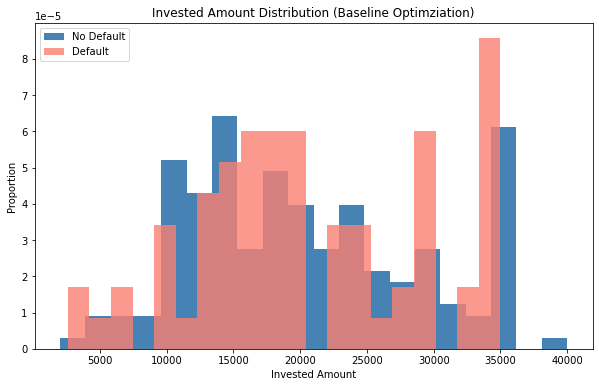

In [102]:
ax = no_default['invested_amount_no_prob'].loc[no_default['default'] == 0].plot.hist(bins = 20, density=True, label='No Default', figsize = (10,6), color='steelblue')
ax = default['invested_amount_no_prob'].loc[default['default'] == 1].plot.hist(bins = 20, density=True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)

ax.set_xlabel('Invested Amount')
ax.set_ylabel('Proportion')
ax.set_title('Invested Amount Distribution (Baseline Optimziation)')
ax.legend();

In [103]:
invested_by_state = pd.DataFrame(no_default.groupby("addr_state")["invested_amount_no_prob"].sum())
invested_by_state = invested_by_state.rename(columns={'invested_amount_no_prob': 'no_default_loans'})
invested_by_state['no_of_no_default'] = pd.DataFrame(no_default['addr_state'].value_counts())
invested_by_state['default_loans'] = pd.DataFrame(default.groupby("addr_state")["invested_amount_no_prob"].sum())
invested_by_state["default_loans"].fillna(0, inplace = True)
invested_by_state['no_of_default'] = pd.DataFrame(default['addr_state'].value_counts())
invested_by_state["no_of_default"].fillna(0, inplace = True)
invested_by_state['sum']=invested_by_state['no_default_loans']+invested_by_state['default_loans']
invested_by_state = invested_by_state.sort_values(by=['sum'], ascending=False)
invested_by_state = invested_by_state.reset_index()
invested_by_state

,addr_state,no_default_loans,no_of_no_default,default_loans,no_of_default,sum
0,CA,343275.0,15,156725.0,8.0,500000.0
1,TX,300300.0,14,160250.0,7.0,460550.0
2,NY,321125.0,15,114975.0,5.0,436100.0
3,FL,227275.0,13,100000.0,4.0,327275.0
4,OH,263275.0,13,38875.0,2.0,302150.0
5,IL,151675.0,8,130825.0,6.0,282500.0
6,CT,135475.0,6,55000.0,2.0,190475.0
7,AZ,100000.0,5,77650.0,3.0,177650.0
8,MA,159025.0,9,16300.0,1.0,175325.0
9,NJ,107675.0,5,53750.0,3.0,161425.0


In [104]:
invested_by_state['no_default_loans'].sum()

3499775.0

In [105]:
invested_by_state['default_loans'].sum()

1410225.0

### Realized Returns Distribution

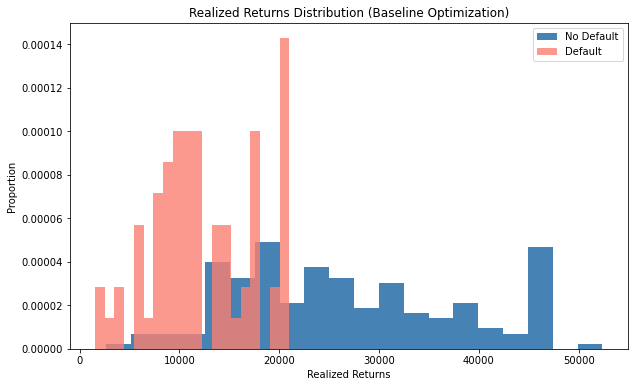

In [106]:
ax = no_default['no_prob_realized_return'].plot.hist(bins = 20, density=True, label='No Default', figsize = (10,6), color='steelblue')
ax = default['no_prob_not_realized_return'].plot.hist(bins = 20, density=True, label='Default', figsize = (10,6), color='salmon', alpha = 0.8)

ax.set_xlabel('Realized Returns')
ax.set_ylabel('Proportion')
ax.set_title('Realized Returns Distribution (Baseline Optimization)')
ax.legend();

## Baseline (invest in all loans)

In [107]:
#EXPECTED, investing all loans
amount_to_invest = (5000000 / output_baseline.shape[0])
exp_return = 5000000+(output_baseline['Expected_return'].mean()*5000000)
print("Expected return test set, all loans: "+str(exp_return))
print("Average expected return test set, all loans: "+str(exp_return/output_baseline.shape[0]))
print("Average return percentage point, all loans: "+str((exp_return-5000000)/5000000))

Expected return test set, all loans: 4668442.715385692
Average expected return test set, all loans: 48.255131690378754
Average return percentage point, all loans: -0.06631145692286156


In [108]:
#REALIZED, investing on all loans

no_defa = output_baseline['default']==0
no_default = output_baseline[no_defa]

defa = output_baseline['default']==1
default = output_baseline[defa]

return_on_no_default = (no_default['int_rate'].mean()+1)*(no_default.shape[0]*amount_to_invest)

return_on_default = (default.shape[0]*amount_to_invest)*0.6

return_together = return_on_no_default+return_on_default

print("Realized return test set, all loans: "+str(return_together))
print("Average return test set, all loans: "+str(return_together/output_baseline.shape[0]))
print("Average return percentage point, all loans: "+str((return_together-5000000)/5000000))

Realized return test set, all loans: 5475502.010439861
Average return test set, all loans: 56.59726094826462
Average return percentage point, all loans: 0.09510040208797213


In [109]:
no_default['amount_to_invest']=amount_to_invest
no_default['return_on_no_default']=((1+no_default['int_rate'])*no_default['amount_to_invest'])

default['amount_to_invest']=amount_to_invest
default['return_on_default']=0.6*default['amount_to_invest']

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [110]:
print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round(no_default['return_on_no_default'].sum()+default['return_on_default'].sum(), 3)))
print('Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: ' + str(round((no_default['return_on_no_default'].sum()+default['return_on_default'].sum())/96745, 2)))

print('Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): ' + str(round((no_default['return_on_no_default'].sum()+default['return_on_default'].sum())/money_invested, 6)))

Realized return of portfolio with original interest rate + (1-LGD)*not_realized: 5475502.01
Average realized return of portfolio with original interest rate + (1-LGD)*not_realized: 56.6
Realized return of portfolio with original interest rate + (1-LGD)*not_realized (percentage point): 1.0951


In [111]:
default.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6575 entries, 16 to 96727
Data columns (total 8 columns):
default                     6575 non-null int64
prob_default                6575 non-null float64
ERL                         6575 non-null float64
int_rate                    6575 non-null float64
Expected_return             6575 non-null float64
Relative_expected_return    6575 non-null float64
amount_to_invest            6575 non-null float64
return_on_default           6575 non-null float64
dtypes: float64(7), int64(1)
memory usage: 462.3 KB
